In [1]:
from sklearn import datasets
#X,y=datasets.make_blobs(n_samples=200,centers=[[5,5],[10,10]],cluster_std=1.5);
X,y = datasets.make_circles(n_samples=500, shuffle=True, factor=0.7, noise=0.1)

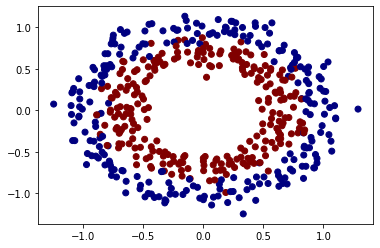

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array(X);
a,b=X.T;
plt.scatter(a,b,c=y,cmap='jet')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
import torch
X_train=torch.from_numpy(X_train.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_test=torch.from_numpy(Y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)

In [4]:
class NeuralNetworkModel(torch.nn.Module):
 def __init__(self):
   super(NeuralNetworkModel,self).__init__()
   self.layer1=torch.nn.Linear(2,5);
   self.layer2=torch.nn.Linear(5,5);
   self.layer3=torch.nn.Linear(5,1);
 def forward(self,x):
   y_hat=torch.sigmoid(self.layer1(x))
   y_hat=torch.sigmoid(self.layer2(y_hat))
   y_hat=torch.sigmoid(self.layer3(y_hat))
   return y_hat
 def func(self,x):
   t=torch.sigmoid(self.layer1(x))
   t=torch.sigmoid(self.layer2(t))
   return t;

In [5]:
def plotmodel():
  x_min, x_max = -1.5, 1.5
  y_min, y_max = -1.5, 1.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
  fig, ax = plt.subplots()
  Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
  Z = Z>0.5;
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  ax.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
model=NeuralNetworkModel()
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [9]:
number_of_epochs=50000
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=criterion(y_prediction,Y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%25000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 25000 ,loss= 0.5490393042564392
epoch: 50000 ,loss= 0.22040848433971405


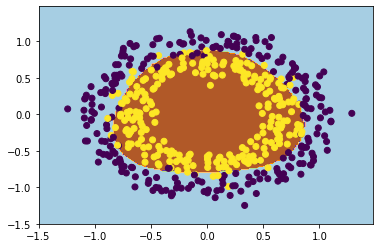

In [10]:
plotmodel()

In [17]:
parm={}
for name, param in model.named_parameters():
  parm[name]=param.detach()
w=parm['layer3.weight'][0]
w=torch.div(w,w.norm(dim=0,p=2))
print(w)

tensor([ 1.4935, -1.6986,  3.9348, -8.9534,  3.8042])
tensor([ 0.1391, -0.1582,  0.3665, -0.8341,  0.3544])


In [18]:
#FROM BLUE TO RED
x0=torch.mul(torch.rand((1,2)),2)
x0.requires_grad=True
x1_hist=[]
x2_hist=[]
x=[]
optimizer=torch.optim.SGD([x0],lr=0.01,momentum=0)
for i in range(100000):
      optimizer.zero_grad();
      loss=-model(x0);
      loss.backward();
      optimizer.step();
      if(i%10000==0):
        #model_plot(model,X,y,'Data',x0.detach().numpy()[0]);
        u=x0[0].clone().detach().numpy();
        x1_hist.append(u[0])
        x2_hist.append(u[1])
        x.append(u)
xt=x0.detach().numpy();

In [19]:
def model_plot1(model,X,y,title,x1_hist,x2_hist): 
    x_min, x_max = -1.5, 1.5
    y_min, y_max = -1.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = Z>0.5;
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    plt.scatter(x1_hist,x2_hist,c='y',cmap='jet')
    plt.plot(x1_hist,x2_hist)
    plt.title(title)
    plt.show()

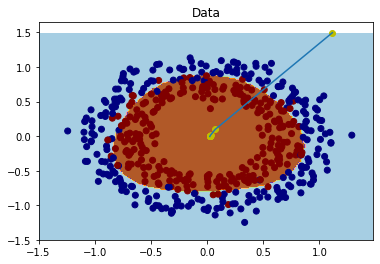

In [20]:
model_plot1(model,X,y,'Data',x1_hist,x2_hist)

In [24]:
print(w)
X_path=torch.Tensor(x)
X_path.shape
Output_path=model.func(X_path)
for i in range(9):
  v=Output_path[i+1]-Output_path[0]
  print(torch.div(v,v.norm(dim=0,p=2)))

tensor([ 0.1391, -0.1582,  0.3665, -0.8341,  0.3544])
tensor([-0.2128,  0.1613, -0.4193,  0.7827, -0.3744], grad_fn=<DivBackward0>)
tensor([-0.1980,  0.1760, -0.4241,  0.7694, -0.3974], grad_fn=<DivBackward0>)
tensor([-0.1953,  0.1861, -0.4311,  0.7564, -0.4115], grad_fn=<DivBackward0>)
tensor([-0.1948,  0.1927, -0.4359,  0.7475, -0.4198], grad_fn=<DivBackward0>)
tensor([-0.1949,  0.1975, -0.4394,  0.7409, -0.4254], grad_fn=<DivBackward0>)
tensor([-0.1951,  0.2012, -0.4420,  0.7359, -0.4296], grad_fn=<DivBackward0>)
tensor([-0.1954,  0.2042, -0.4441,  0.7318, -0.4328], grad_fn=<DivBackward0>)
tensor([-0.1957,  0.2068, -0.4458,  0.7284, -0.4354], grad_fn=<DivBackward0>)
tensor([-0.1960,  0.2090, -0.4472,  0.7255, -0.4376], grad_fn=<DivBackward0>)


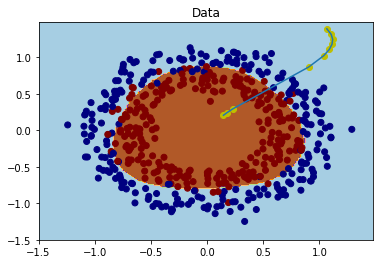

In [26]:
#FROM RED TO BLUE
x0=torch.mul(torch.rand((1,2)),0.5)
x0.requires_grad=True
x1_hist=[]
x2_hist=[]
x=[]
optimizer=torch.optim.SGD([x0],lr=0.01,momentum=0)
for i in range(5000):
      optimizer.zero_grad();
      loss=model(x0);
      loss.backward();
      optimizer.step();
      if(i%500==0):
        #model_plot(model,X,y,'Data',x0.detach().numpy()[0]);
        u=x0[0].clone().detach().numpy();
        x1_hist.append(u[0])
        x2_hist.append(u[1])
        x.append(u)
xt=x0.detach().numpy();
model_plot1(model,X,y,'Data',x1_hist,x2_hist)

In [27]:
print(w)
X_path=torch.Tensor(x)
X_path.shape
Output_path=model.func(X_path)
for i in range(9):
  v=Output_path[i+1]-Output_path[0]
  print(torch.div(v,v.norm(dim=0,p=2)))

tensor([ 0.1391, -0.1582,  0.3665, -0.8341,  0.3544])
tensor([-0.4003,  0.2165, -0.5873,  0.4402, -0.5041], grad_fn=<DivBackward0>)
tensor([-0.3778,  0.2193, -0.5773,  0.4773, -0.4981], grad_fn=<DivBackward0>)
tensor([-0.2246,  0.1627, -0.4353,  0.7677, -0.3797], grad_fn=<DivBackward0>)
tensor([-0.2232,  0.1622, -0.4371,  0.7675, -0.3791], grad_fn=<DivBackward0>)
tensor([-0.2227,  0.1620, -0.4379,  0.7674, -0.3789], grad_fn=<DivBackward0>)
tensor([-0.2223,  0.1619, -0.4383,  0.7673, -0.3789], grad_fn=<DivBackward0>)
tensor([-0.2220,  0.1619, -0.4385,  0.7672, -0.3791], grad_fn=<DivBackward0>)
tensor([-0.2216,  0.1621, -0.4384,  0.7671, -0.3795], grad_fn=<DivBackward0>)
tensor([-0.2209,  0.1627, -0.4378,  0.7670, -0.3805], grad_fn=<DivBackward0>)


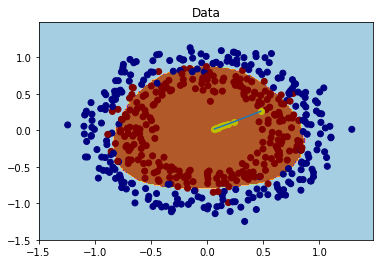

In [28]:
#FROM RED TO RED
x0=torch.mul(torch.rand((1,2)),0.5)
x0.requires_grad=True
x1_hist=[]
x2_hist=[]
x=[]
optimizer=torch.optim.SGD([x0],lr=0.01,momentum=0)
for i in range(10000):
      optimizer.zero_grad();
      loss=-model(x0);
      loss.backward();
      optimizer.step();
      if(i%1000==0):
        #model_plot(model,X,y,'Data',x0.detach().numpy()[0]);
        u=x0[0].clone().detach().numpy();
        x1_hist.append(u[0])
        x2_hist.append(u[1])
        x.append(u)
xt=x0.detach().numpy();
model_plot1(model,X,y,'Data',x1_hist,x2_hist)

In [30]:
print(w)
X_path=torch.Tensor(x)
X_path.shape
Output_path=model.func(X_path)
for i in range(9):
  v=Output_path[i+1]-Output_path[0]
  print(torch.div(v,v.norm(dim=0,p=2)))

tensor([ 0.1391, -0.1582,  0.3665, -0.8341,  0.3544])
tensor([ 0.3089, -0.2014,  0.5296, -0.6117,  0.4575], grad_fn=<DivBackward0>)
tensor([ 0.3201, -0.2027,  0.5372, -0.5954,  0.4620], grad_fn=<DivBackward0>)
tensor([ 0.3262, -0.2024,  0.5406, -0.5878,  0.4635], grad_fn=<DivBackward0>)
tensor([ 0.3302, -0.2016,  0.5427, -0.5835,  0.4640], grad_fn=<DivBackward0>)
tensor([ 0.3332, -0.2007,  0.5441, -0.5808,  0.4640], grad_fn=<DivBackward0>)
tensor([ 0.3354, -0.1999,  0.5450, -0.5790,  0.4639], grad_fn=<DivBackward0>)
tensor([ 0.3372, -0.1990,  0.5457, -0.5778,  0.4637], grad_fn=<DivBackward0>)
tensor([ 0.3387, -0.1983,  0.5463, -0.5769,  0.4635], grad_fn=<DivBackward0>)
tensor([ 0.3399, -0.1976,  0.5467, -0.5762,  0.4632], grad_fn=<DivBackward0>)


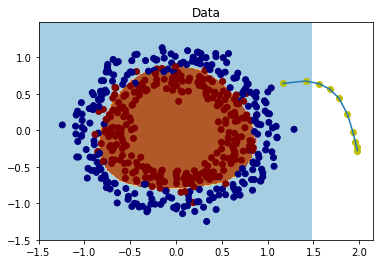

In [33]:
#FROM BLUE TO BLUE
x0=torch.mul(torch.rand((1,2)),1.2)
x0.requires_grad=True
x1_hist=[]
x2_hist=[]
x=[]
optimizer=torch.optim.SGD([x0],lr=0.01,momentum=0)
for i in range(10000):
      optimizer.zero_grad();
      loss=model(x0);
      loss.backward();
      optimizer.step();
      if(i%1000==0):
        u=x0[0].clone().detach().numpy();
        x1_hist.append(u[0])
        x2_hist.append(u[1])
        x.append(u)
xt=x0.detach().numpy();
model_plot1(model,X,y,'Data',x1_hist,x2_hist)

In [34]:
print(w)
X_path=torch.Tensor(x)
X_path.shape
Output_path=model.func(X_path)
for i in range(9):
  v=Output_path[i+1]-Output_path[i]
  print(torch.div(v,v.norm(dim=0,p=2)))

tensor([ 0.1391, -0.1582,  0.3665, -0.8341,  0.3544])
tensor([-0.1392,  0.1346, -0.5487,  0.7405, -0.3363], grad_fn=<DivBackward0>)
tensor([-0.0849,  0.1503, -0.5933,  0.7200, -0.3159], grad_fn=<DivBackward0>)
tensor([-0.0781,  0.2059, -0.5585,  0.7231, -0.3417], grad_fn=<DivBackward0>)
tensor([-0.0964,  0.2781, -0.4907,  0.7230, -0.3872], grad_fn=<DivBackward0>)
tensor([-0.1215,  0.3381, -0.4476,  0.6962, -0.4312], grad_fn=<DivBackward0>)
tensor([-0.1471,  0.3980, -0.4642,  0.6102, -0.4819], grad_fn=<DivBackward0>)
tensor([-0.1749,  0.4696, -0.4919,  0.4717, -0.5333], grad_fn=<DivBackward0>)
tensor([-0.1950,  0.5209, -0.4988,  0.3606, -0.5584], grad_fn=<DivBackward0>)
tensor([-0.2077,  0.5518, -0.4953,  0.2929, -0.5668], grad_fn=<DivBackward0>)
